In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


**Importing Data**

In [5]:
data=pd.read_csv("Crimes.csv")

**Knowing about the data**

In [9]:
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [10]:
data.shape

(9017, 33)

**Removing total column from dataset**

In [11]:
data2 = data[data['DISTRICT'].str.contains('TOTAL')==False]
data2.shape

(8597, 33)

**A graph to display total no. of crimes in each state.**

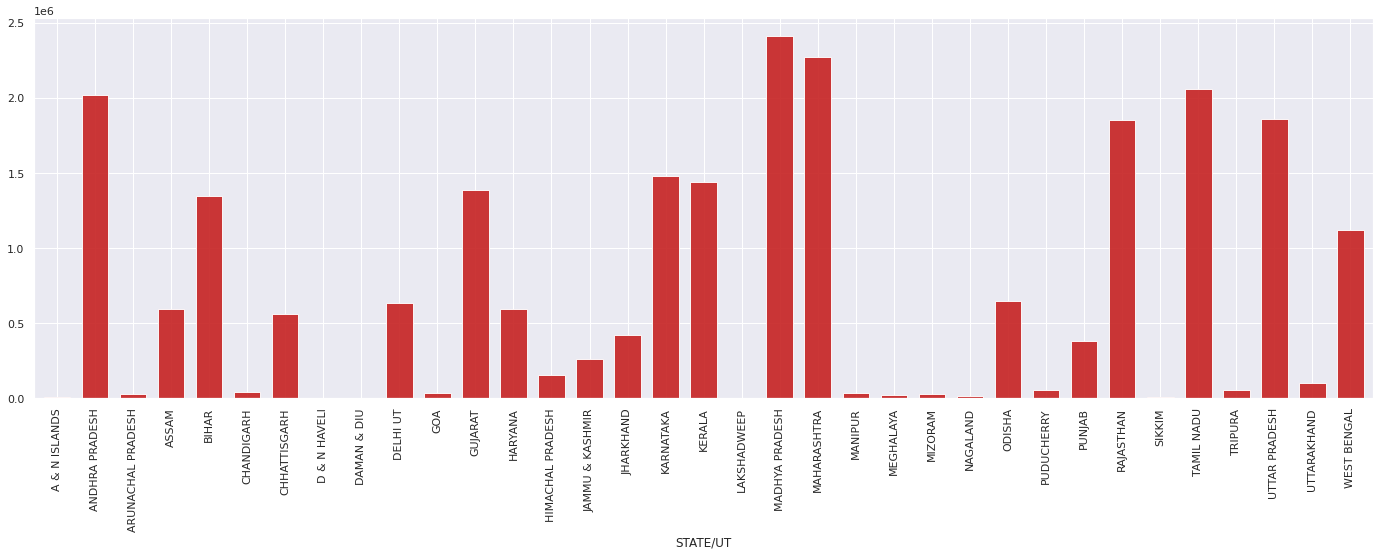

In [19]:
#Q1 - A graph to display total no. of crimes in each state

state = data2.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(24, 7))
state.plot(kind = 'bar', color = '#C62121', alpha = 0.90, width = 0.70)

In [21]:
#Q2 - Depict 10 states with the highest number of IPC crimes.

total_cases = data2[['STATE/UT','TOTAL IPC CRIMES']].copy()
total_cases.sort_values(by = 'TOTAL IPC CRIMES', ascending = False, inplace = True)
total_cases.head()

,STATE/UT,TOTAL IPC CRIMES
7738,KERALA,34638
7044,MAHARASHTRA,33932
5504,MAHARASHTRA,32770
7829,MAHARASHTRA,32647
6145,KARNATAKA,32380


Text(0.5, 0, 'TOTAL IPC CRIMES')

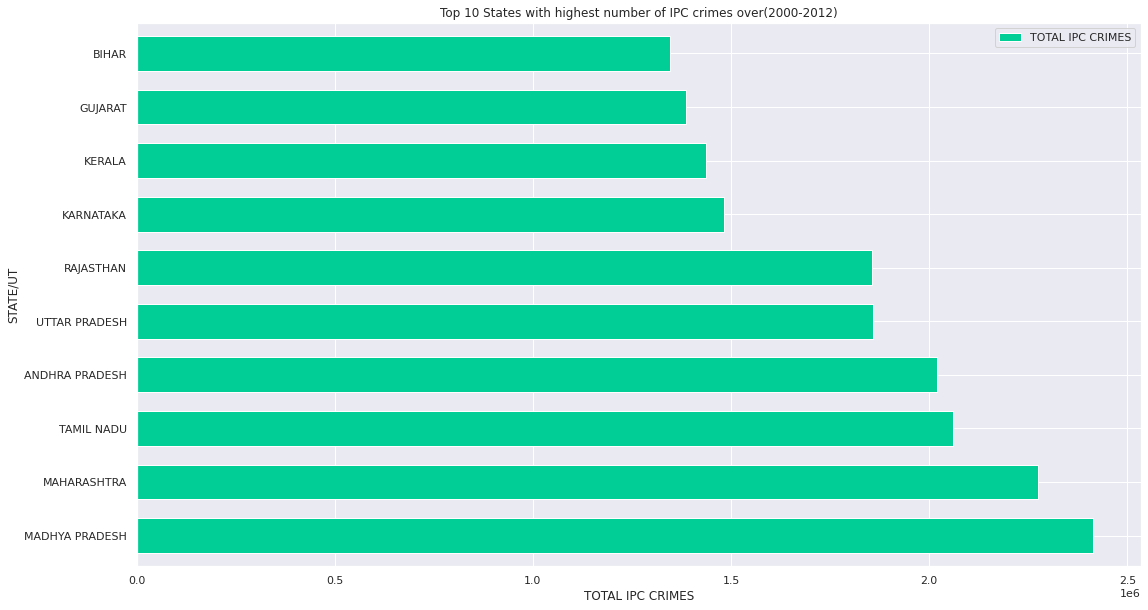

In [22]:
state = total_cases.groupby('STATE/UT', sort = False).sum()
sorted_state = state.sort_values(by = 'TOTAL IPC CRIMES', ascending = False)
sorted_state.head(10).plot(kind = 'barh', color = '#00CE96', width = 0.65,figsize = (18,10), title = "Top 10 States with highest number of IPC crimes over(2000-2012)")
plt.xlabel("TOTAL IPC CRIMES")

***QUESTION 3 A graph showing district wise distribution of crimes in Arunachal Pradesh, Uttar Pradesh and West Bengal for the year 2001 and 2004.***

In [ ]:
#- Arunachal Pradesh year 2001
Arunachal = data2[data2['STATE/UT'].str.contains('ARUNACHAL PRADESH')==True]
Arunachal_2001 = Arunachal[Arunachal['YEAR'] <= 2001]

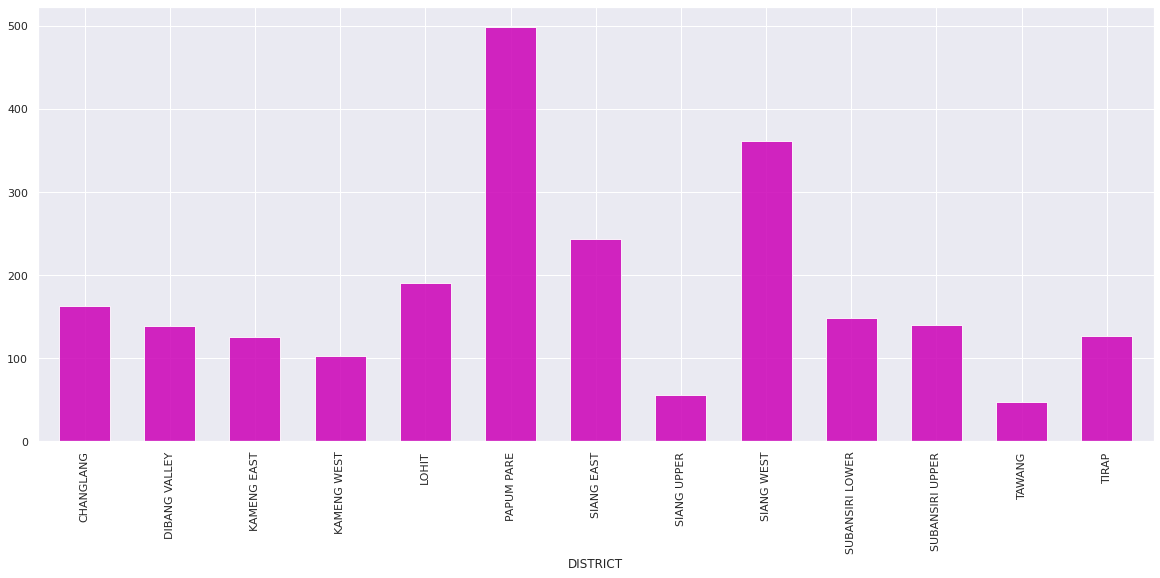

In [ ]:
a = Arunachal_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
a.plot(kind = 'bar', color = '#cc02b7', alpha = 0.86, width = 0.6)

In [ ]:
#- Arunachal Pradesh year 2004
Arunachal_2004 = Arunachal[(Arunachal['YEAR'] >= 2004) & (Arunachal['YEAR'] < 2005)]

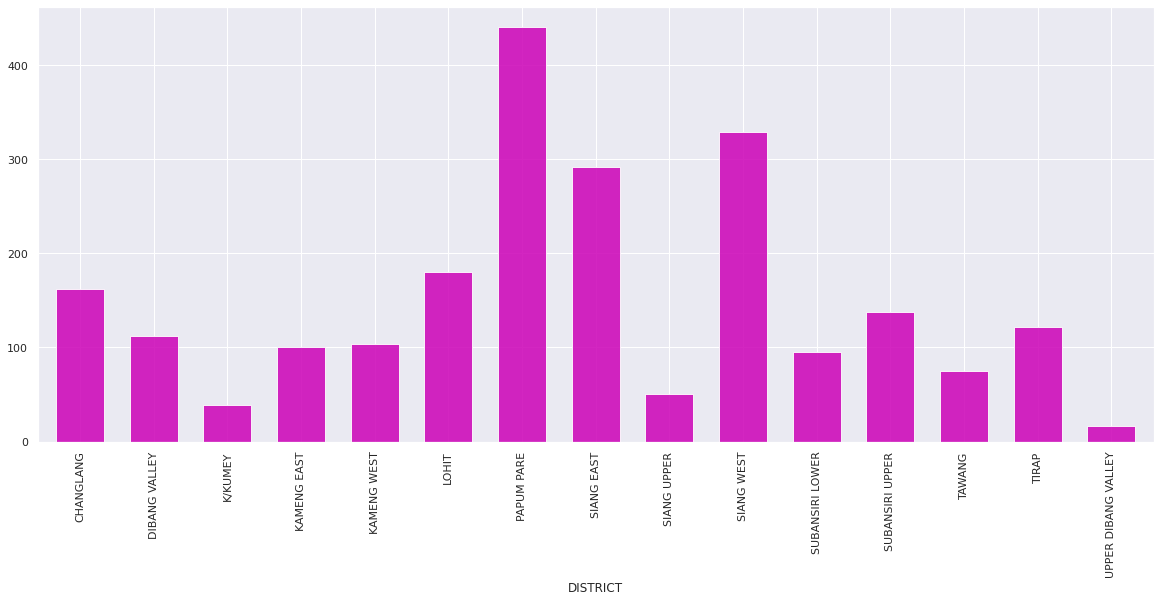

In [ ]:
a = Arunachal_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
a.plot(kind = 'bar', color = '#cc02b7', alpha = 0.86, width = 0.65)

In [ ]:
#  Uttar Pradesh, year 2001
Uttar_Pradesh = data2[data2['STATE/UT'].str.contains('UTTAR PRADESH')==True]
Uttar_Pradesh_2001 = Uttar_Pradesh[Uttar_Pradesh['YEAR'] <= 2001]

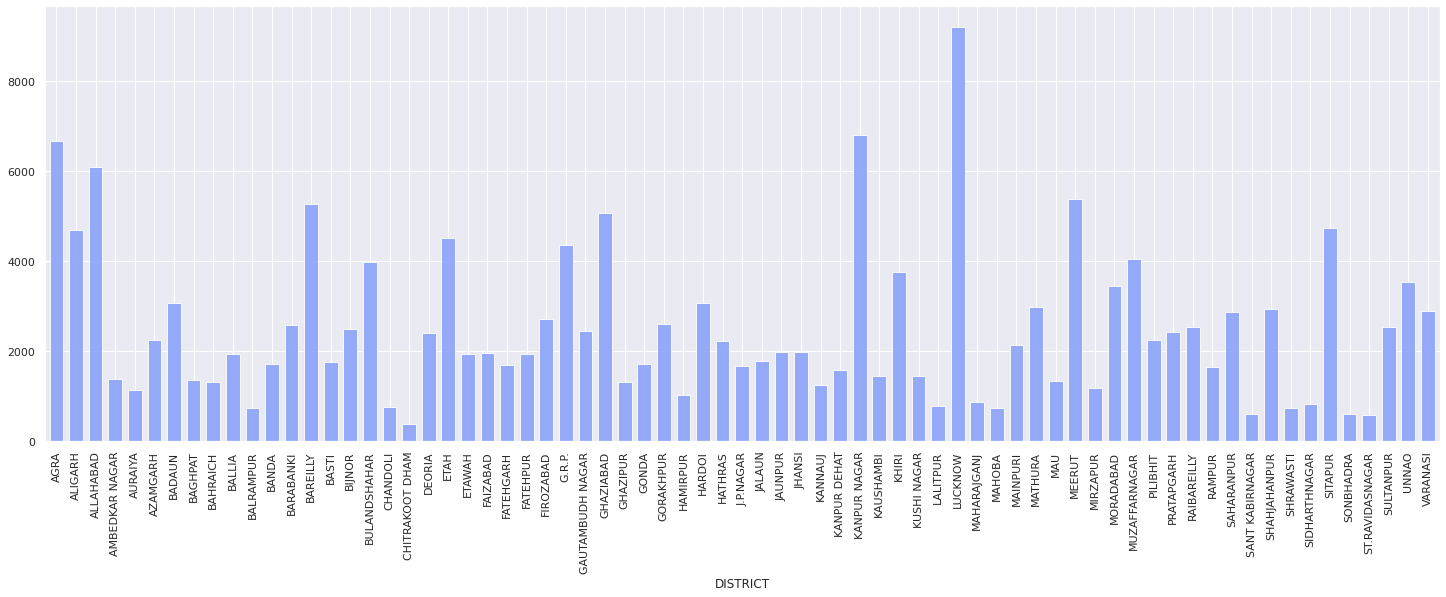

In [ ]:
a = Uttar_Pradesh_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(25, 8))
a.plot(kind = 'bar', color = '#869ff9', alpha = 0.86, width = 0.7)

In [ ]:
#  Uttar Pradesh, year 2004
Uttar_Pradesh_2004 = Uttar_Pradesh[(Uttar_Pradesh['YEAR'] >= 2004) & (Uttar_Pradesh['YEAR'] < 2005)]

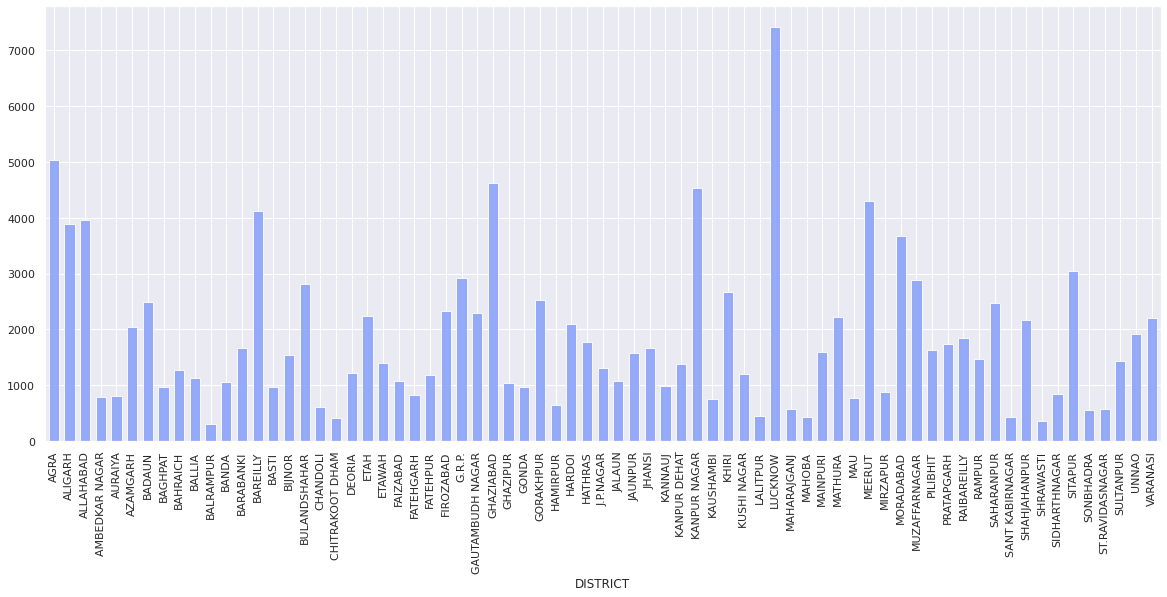

In [ ]:
a = Uttar_Pradesh_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
a.plot(kind = 'bar', color = '#869ff9', alpha = 0.86, width = 0.65)

In [ ]:
#  West Bengal, year 2001
West_Bengal = data2[data2['STATE/UT'].str.contains('WEST BENGAL')==True]
West_Bengal_2001 = West_Bengal[West_Bengal['YEAR'] <= 2001]

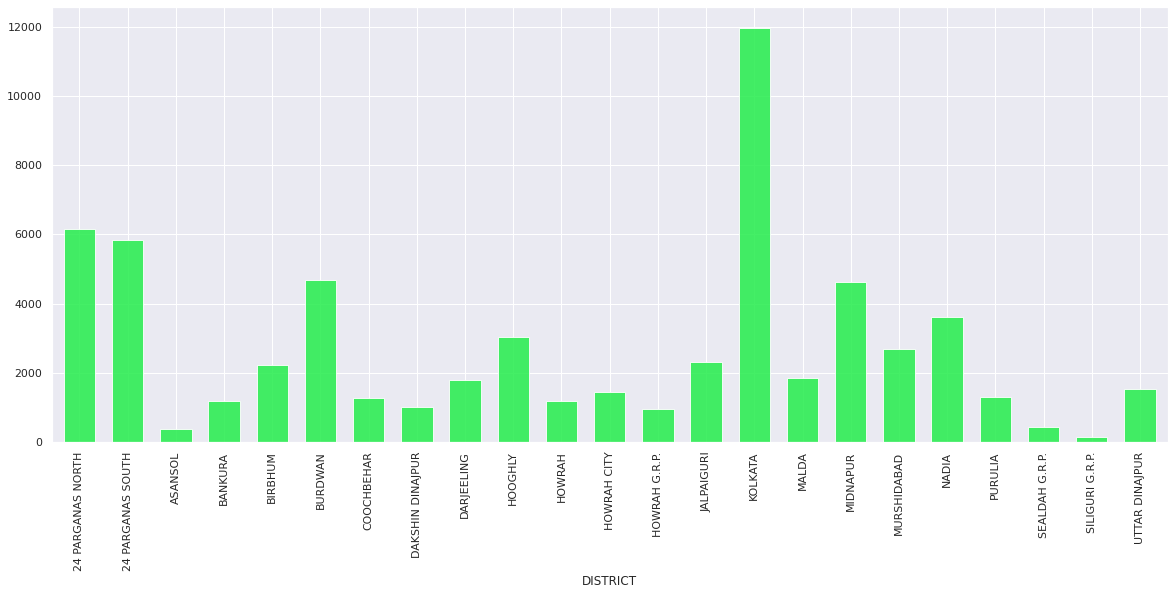

In [ ]:
a = West_Bengal_2001.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
a.plot(kind = 'bar', color = '#25ed4d', alpha = 0.86, width = 0.65)

In [ ]:
#  West Bengal, year 2004
West_Bengal_2004 = West_Bengal[(West_Bengal['YEAR'] >= 2004) & (West_Bengal['YEAR'] < 2005)]

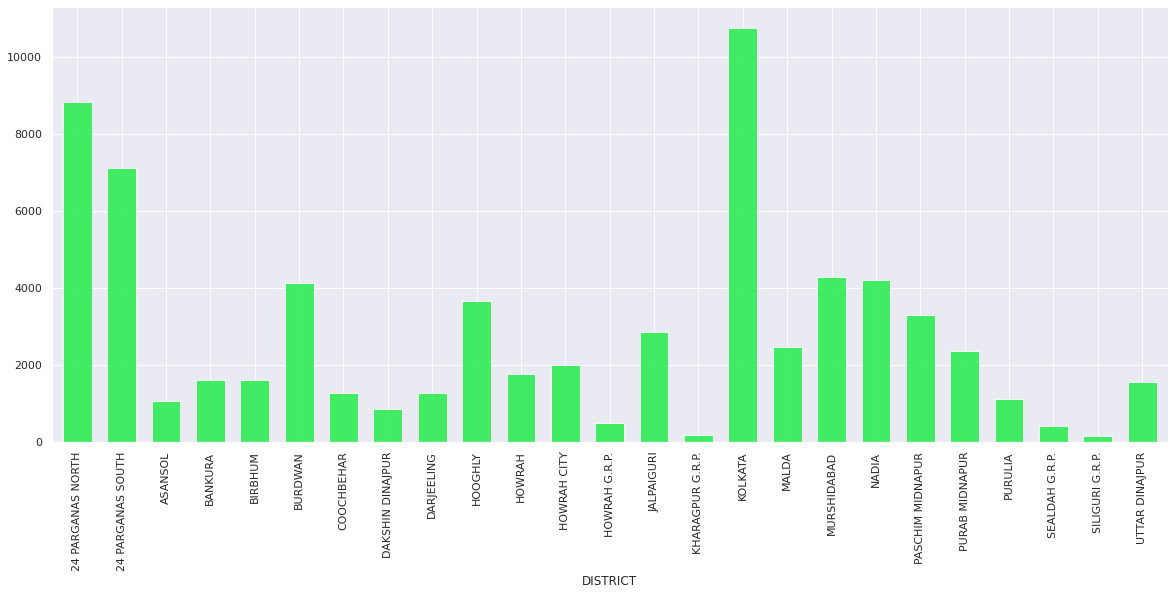

In [ ]:
a = West_Bengal_2004.groupby('DISTRICT')['TOTAL IPC CRIMES'].sum()
sns.set()
plt.figure(figsize=(20, 8))
a.plot(kind = 'bar', color = '#25ed4d', alpha = 0.86, width = 0.65)

**Question 4 state which has the most crimes committed against children and women.**

In [24]:
#Q4 - state which has the most crimes committed against children and women.

crime = data2[['STATE/UT', 'YEAR', 'RAPE', 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'DOWRY DEATHS', 
              'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN', 
              'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']].copy()
crime['Crime Against Women'] = (crime['RAPE']
                               +crime['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS']
                               +crime['DOWRY DEATHS']
                               +crime['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']
                               +crime['INSULT TO MODESTY OF WOMEN']
                               +crime['CRUELTY BY HUSBAND OR HIS RELATIVES']
                               +crime['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'])

crime.head()

,STATE/UT,YEAR,RAPE,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,Crime Against Women
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0,454
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0,356
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0,456
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0,278
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0,475


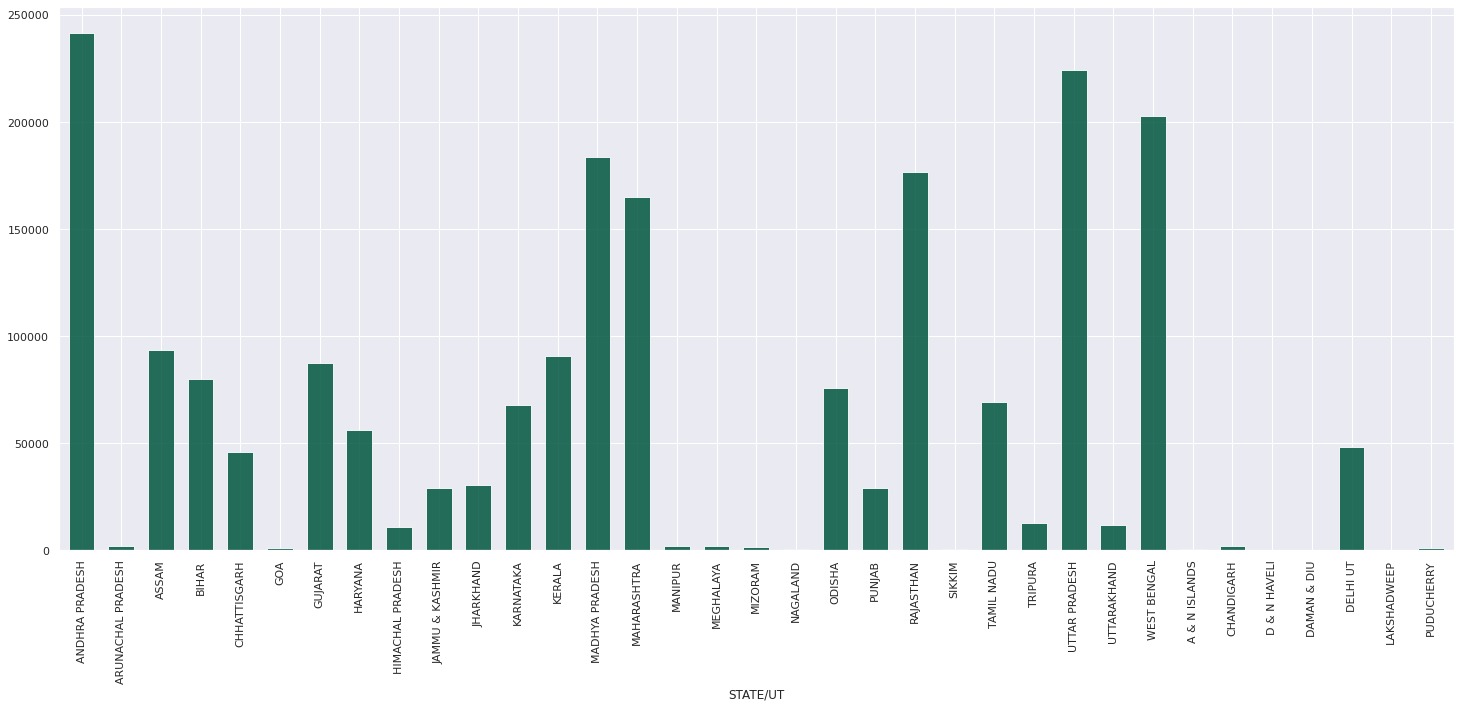

In [27]:
a = crime.groupby('STATE/UT', sort = False)['Crime Against Women'].sum()
sns.set()
plt.figure(figsize=(25, 10))
a.plot(kind = 'bar', color = '#025740', alpha = 0.86, width = 0.65)

In [31]:
#Q5 - Fill the Crimes column in the dataset with appropriate values

col_list= list(data)
col_list.remove('YEAR')
data['Crimes'] = data[col_list].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


In [ ]:
data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Crimes
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,8603
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,8692
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,12445
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,6498
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,14107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,127
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,127
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,1663
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,632,0,7,2,5,0,219,1668,3494,7589
